In [7]:
import keras.utils
import tensorflow as tf
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [8]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print("Training data shape:", train_data.shape)
print("Training targets shape:", train_targets.shape)
print("Test data shape:", test_data.shape)
print("Test targets shape:", test_targets.shape)

Training data shape: (404, 13)
Training targets shape: (404,)
Test data shape: (102, 13)
Test targets shape: (102,)


In [9]:
train_data[:5]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01]])

In [10]:
train_targets[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

In [11]:
# Предобработка данных
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [12]:
train_data[:5]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006],
       [-0.40149354, -0.48361547, -0.86940196, -0.25683275, -0.3615597 ,
        -0.3245576 , -1.23667187,  1.10717989, -0.51114231, -1.094663  ,
         0.78447637,  0.44807713, -0.65292624],
       [-0.0056343 , -0.48361547,  1.0283258 , -0.25683275,  1.32861221,
         0.15364225,  0.69480801, -0.57857203,  1.67588577,  1.5652875 ,
         0.78447637,  0.3898823 ,  0.26349695]])

In [13]:
def build_model(seed):
    tf.random.set_seed(seed)
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        layers.Dropout(0.1, seed=seed),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.summary()
    return model

In [14]:
s = 42
keras.utils.set_random_seed(s)
tf.random.set_seed(s)
model = build_model(s)
history = model.fit(train_data, train_targets, epochs=300, verbose=0, batch_size=16)
print('mae: ', history.history['mae'][-1], '\n', 'mse: ', history.history['loss'][-1])

C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,625 (104.00 KB)

 Trainable params: 26,625 (104.00 KB)

 Non-trainable params: 0 (0.00 B)

mae:  0.9088674187660217 
 mse:  1.4158389568328857


In [15]:
mae_history = history.history['mae']
mse_history = history.history['loss']

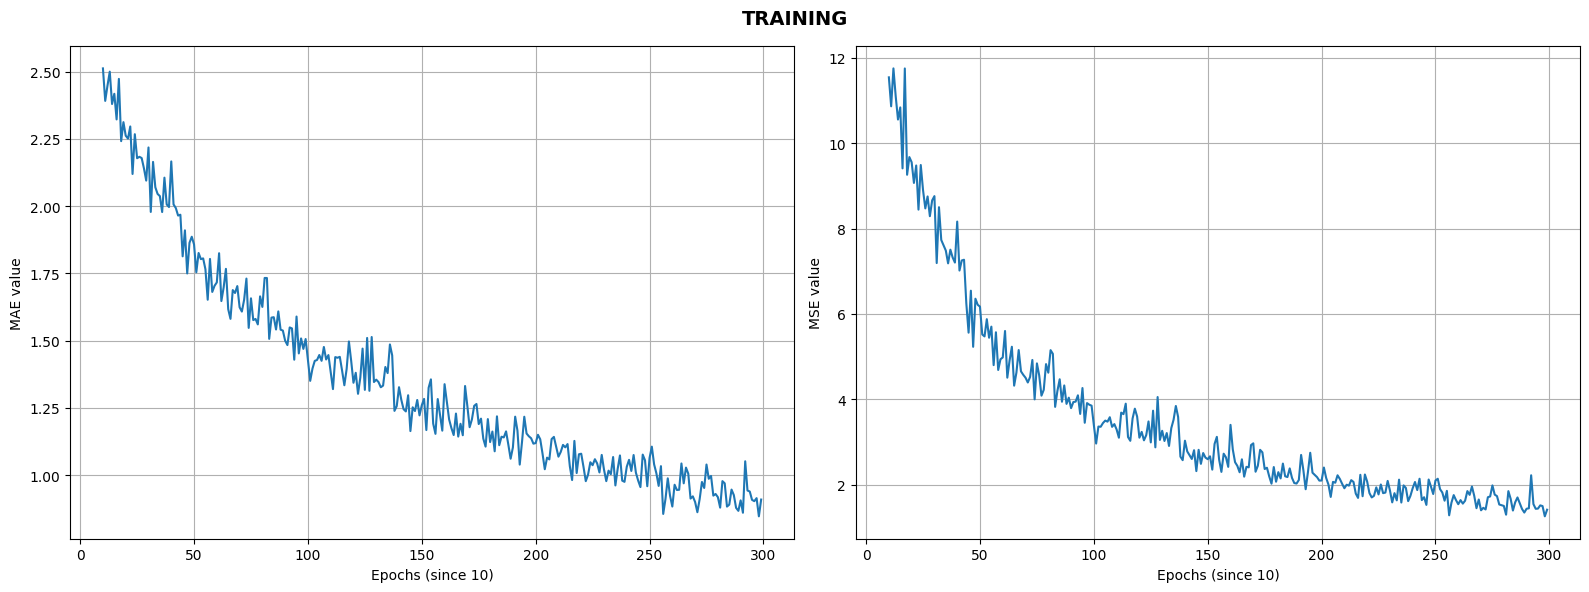

In [16]:
f, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(range(len(mae_history))[10:], mae_history[10:])
axs[0].set_xlabel('Epochs (since 10)')
axs[0].set_ylabel('MAE value')
axs[0].grid(True)

axs[1].plot(range(len(mse_history))[10:], mse_history[10:])
axs[1].set_xlabel('Epochs (since 10)')
axs[1].set_ylabel('MSE value')
axs[1].grid(True)

f.suptitle('TRAINING', size=14, fontweight='bold')
plt.tight_layout()

In [17]:
mse, mae = model.evaluate(test_data, test_targets, verbose=0)
print(mae, mse)

2.273099899291992 11.473958969116211


In [18]:
without_mc = model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [19]:
# MC Dropout на инференсе
N = 100  # Число прогонов
preds = []

for i in range(N):
    y_pred = model(test_data, training=True)  # Активация dropout
    preds.append(y_pred.numpy().flatten())

preds = np.array(preds)
mu = preds.mean(axis=0)
sigma = preds.std(axis=0)

# Границы доверительного интервала
lower = mu - 1.96 * sigma
upper = mu + 1.96 * sigma


In [20]:
preds

array([[ 7.3158317, 19.556705 , 19.083563 , ..., 45.86937  , 28.150864 ,
        20.72489  ],
       [ 6.399664 , 19.191303 , 19.44952  , ..., 47.44512  , 28.681034 ,
        21.096123 ],
       [ 7.569318 , 19.519997 , 19.252676 , ..., 44.517944 , 28.769627 ,
        21.25184  ],
       ...,
       [ 5.9159193, 18.847736 , 19.684679 , ..., 45.82136  , 28.87988  ,
        20.877277 ],
       [ 7.582537 , 19.035343 , 19.147627 , ..., 44.50153  , 28.4635   ,
        20.842148 ],
       [ 7.0351343, 19.019249 , 18.253405 , ..., 47.27186  , 30.171738 ,
        21.68699  ]], dtype=float32)

In [21]:
# 0 - предсказания без использования MC Dropout
# 1 - с MC Dropout
# 2 - истинные значения
compare_df = np.column_stack((without_mc, mu, test_targets))
compare_df

array([[ 6.57948256,  6.84552288,  7.2       ],
       [18.87742043, 18.99236488, 18.8       ],
       [18.88038635, 19.15972519, 19.        ],
       [28.45565605, 29.29254341, 27.        ],
       [22.51685905, 23.10539055, 22.2       ],
       [23.14343262, 23.20892525, 24.5       ],
       [28.16364288, 28.87232399, 31.2       ],
       [20.08608627, 20.47049713, 22.9       ],
       [18.4220295 , 18.83462334, 20.5       ],
       [19.77159691, 19.94874954, 23.2       ],
       [18.87295532, 19.10884094, 18.6       ],
       [17.09851074, 17.11153984, 14.5       ],
       [16.2022171 , 16.26470184, 17.8       ],
       [42.76092911, 43.43896103, 50.        ],
       [19.58185768, 20.05858612, 20.8       ],
       [20.52171898, 20.73365784, 24.3       ],
       [23.14884567, 23.76752472, 24.2       ],
       [18.03316689, 18.35311317, 19.8       ],
       [19.90100861, 19.87082481, 19.1       ],
       [19.60228157, 20.23215485, 22.7       ],
       [11.2727766 , 11.44399643, 12.   

In [22]:
mean_uncertainty = np.mean(sigma)
median_uncertainty = np.median(sigma)

print(f"Средняя неопределённость: {mean_uncertainty:.4f}")
print(f"Медианная неопределённость: {median_uncertainty:.4f}")

Средняя неопределённость: 0.7182
Медианная неопределённость: 0.6399


In [46]:
# Нахождение значений за пределами доверительного интервала 1
outside_interval_count = 0
outside_interval_arr = []
for i in range(mu.shape[0]):
    if lower[i] > test_targets[i] or test_targets[i] > upper[i]:
        outside_interval_count += 1
        outside_interval_arr.append(i)

print('Кол-во предсказаний далеких от реальности: ', outside_interval_count, f'({round(outside_interval_count/102, 2)*100} %)')
print(outside_interval_arr)

Кол-во предсказаний далеких от реальности:  55 (54.0 %)
[5, 6, 7, 8, 9, 11, 12, 13, 15, 17, 19, 23, 28, 29, 30, 31, 36, 37, 40, 41, 44, 49, 51, 52, 53, 56, 59, 60, 62, 63, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 88, 91, 92, 93, 97, 100, 101]


In [47]:
# Нахождение значений за пределами доверительного интервала 2
over_outside_interval_count = 0
over_outside_interval_arr = []
koef = 1.5
for i in range(mu.shape[0]):
    if lower[i] / (mean_uncertainty*koef) > test_targets[i] or test_targets[i] > upper[i] * (mean_uncertainty*koef):
        over_outside_interval_count += 1
        over_outside_interval_arr.append(i)

print('Кол-во предсказаний СЛИШКОМ далеких от реальности: ', over_outside_interval_count, f'({round(over_outside_interval_count/102, 2)*100} %)')
print(over_outside_interval_arr)

Кол-во предсказаний СЛИШКОМ далеких от реальности:  23 (23.0 %)
[7, 9, 11, 13, 15, 23, 29, 31, 36, 37, 40, 49, 56, 60, 62, 68, 69, 73, 77, 85, 92, 97, 101]


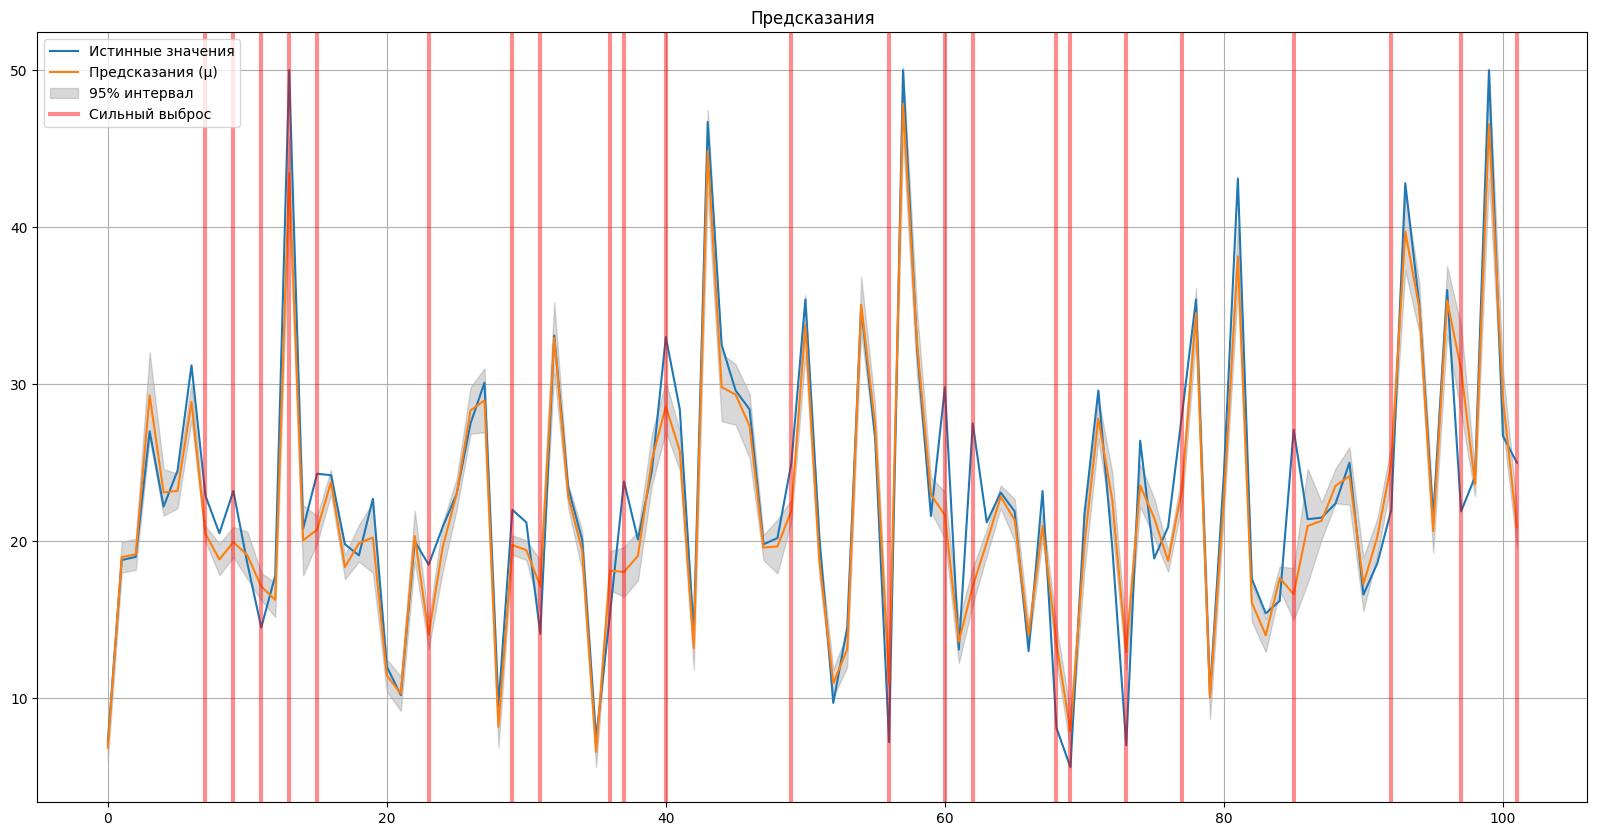

In [48]:
plt.figure(figsize=(20, 10))
first_n = len(test_targets)
plt.plot(test_targets[:first_n], label='Истинные значения')
plt.plot(mu[:first_n], label='Предсказания (μ)')
# plt.plot(without_mc[:first_n], label='Без MC', c='red')
plt.fill_between(range(len(mu[:first_n])), lower[:first_n], upper[:first_n], color='gray', alpha=0.3, label='95% интервал')

# Вертикальные линии - места, где истинные значения за пределами доверительного интервала
outside_interval_arr_clipped = list(filter(lambda x: x <= first_n, outside_interval_arr))
over_outside_interval_arr_clipped = list(filter(lambda x: x <= first_n, over_outside_interval_arr))
usage_interval = over_outside_interval_arr_clipped
for i in range(len(usage_interval)):
    label = 'Сильный выброс' if i == 0 else ''
    plt.axvline(usage_interval[i], linewidth=3, c='r', alpha=0.45, label=label)

plt.legend()
plt.title('Предсказания')
plt.grid(True)
# plt.xticks(range(len(mu[:first_n])))
# plt.tight_layout()
plt.show()

In [25]:
import watermark

In [26]:
%load_ext watermark
%watermark -iv

tensorflow: 2.16.1
pandas    : 2.2.1
numpy     : 1.25.2
sys       : 3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]
keras     : 3.1.1
watermark : 2.5.0
matplotlib: 3.8.3



In [27]:
!python --version

Python 3.10.7
